### Q12) Implement Linear Regression problem. For example, based onthe “Advertising” dataset comprising of budget of TV, Radio etc. and the sales data, predict the estimated sales for TV budget.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
print("\n-*-*-*-*-*-*-*-* Simple Linear Regression Model *-*-*-*-*-*-*-*-*-*-*\n")
df = pd.read_csv('Advertising.csv')
print("Dataset chosen:")
df.head()


-*-*-*-*-*-*-*-* Simple Linear Regression Model *-*-*-*-*-*-*-*-*-*-*

Dataset chosen:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
print("---For Simple Linear Regression---")
df_binary = df[['radio', 'sales']]
df_binary.head()

---For Simple Linear Regression---


,radio,sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


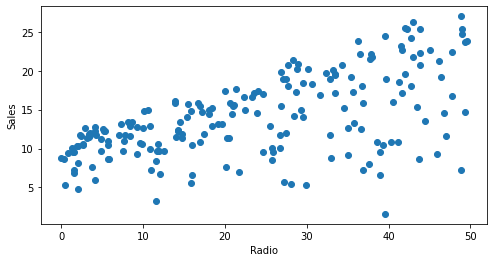

In [4]:
df_binary.isnull().sum()
plt.figure(figsize=(8, 4))
plt.scatter(df_binary['radio'], df_binary['sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

In [5]:
x = np.array(df_binary['radio']).reshape(-1, 1)
y = np.array(df_binary['sales']).reshape(-1, 1)
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=4)
SLR = LinearRegression()
SLR.fit(x_train, y_train)

print('Intercept: ',round(SLR.intercept_[0],4))
print('Coefficient: ',round(SLR.coef_[0][0],5))

print("\nThe linear model is: y = {:.5} + {:.5}x".format(SLR.intercept_[0], SLR.coef_[0][0]))

y_pred=SLR.predict(x_test)
y=SLR.predict(np.array([1000]).reshape(1,-1))
print("\nPredicted Value for the sale of radios: ", y)

print("\nAccuracy Score: ", round(SLR.score(x_test,y_test),5))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test,y_pred),4))
print('Root Mean Square Error: ', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4))

print('Train Score :', round(SLR.score(x_train,y_train),5))
print('Test Score:', round(SLR.score(x_test,y_test),5))

Intercept:  9.2862
Coefficient:  0.20374

The linear model is: y = 9.2862 + 0.20374x

Predicted Value for the sale of radios:  [[213.02220968]]

Accuracy Score:  0.33235
Mean Squared Error:  17.0113
Root Mean Square Error:  4.1245
Train Score : 0.32967
Test Score: 0.33235


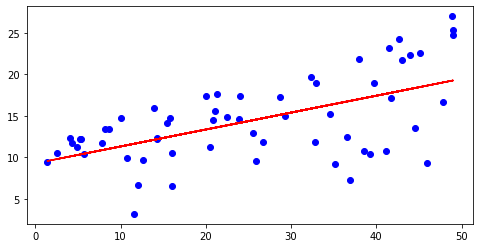

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_pred, color="red")
plt.show()

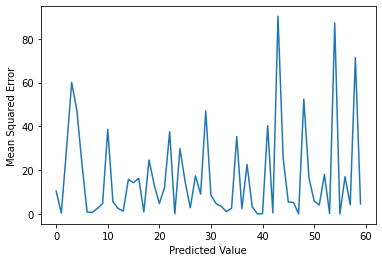

In [7]:
errors = list()
for i in range(len(y_test)):
    E1 = (y_test[i] - y_pred[i])**2
    errors.append(E1)
plt.plot(errors)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()